# CSE 158 Assignment 2 EDA

In [1]:
import gzip
import numpy as np
import pandas as pd
import json
import time
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Runtime Analysis

In [2]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)


start = time.time()
reviews = []
for l in parse("/Users/matildagaddi/Documents/UCSD_Courses/CSE158/assignment2/review-Idaho.json.gz"):
    reviews.append(l)
end = time.time()
print(f"reviews parse time = {end-start}s") #48 earlier, 108 now, 


start = time.time()
bizs = []
for l in parse("/Users/matildagaddi/Documents/UCSD_Courses/CSE158/assignment2/meta-Idaho.json.gz"):
    bizs.append(l)
end = time.time()
print(f"bizs parse time = {end-start}s") # 66 now

reviews parse time = 107.5434513092041s
bizs parse time = 66.49609375s


In [10]:
print(len(reviews))
print(len(bizs))
print(reviews[0])
print('----------------------------------------')
print(bizs[0])

3892636
33214
{'user_id': '107842099430937493658', 'name': 'Jason Johnson', 'time': 1499810222323, 'rating': 3, 'text': 'Nice place, but not enough dog friendly areas along the river to fish from. Best if you have a boat. I really need to get a boat!', 'pics': [{'url': ['https://lh5.googleusercontent.com/p/AF1QipNUzuWpjSvRzdHFVTo7UEwHce0q0w8wNq-0JRZP=w150-h150-k-no-p']}], 'resp': None, 'gmap_id': '0x54af0dfadab474e1:0x3ae5c949132941d8'}
----------------------------------------
{'name': 'Montour WMA - Idaho Fish and Game', 'address': 'Montour WMA - Idaho Fish and Game, Montour Rd, Emmett, ID 83617', 'gmap_id': '0x54af0dfadab474e1:0x3ae5c949132941d8', 'description': None, 'latitude': 43.9295808, 'longitude': -116.3333273, 'category': ['Hunting area'], 'avg_rating': 4.4, 'num_of_reviews': 17, 'price': None, 'hours': None, 'MISC': {'Accessibility': ['Wheelchair accessible parking lot']}, 'state': None, 'relative_results': ['0x54af0df970009eab:0x998e663a1d2ea45', '0x54af0e08fb885aed:0xf626f

In [4]:
# Calculated looping time

# start = time.time()
# new_list = []
# for i in reviews:
#     new_list.append(i)
# end = time.time()
# print(f"reviews loop thru list time = {end-start}s")

# start = time.time()
# new_list2 = []
# for i in bizs:
#     new_list.append(i)
# end = time.time()
# print(f"bizs loop thru list time = {end-start}s")

reviews loop thru list time = 11.980879068374634s
bizs loop thru list time = 0.1700458526611328s


In [5]:
CA_parse_mins = 70.5/3.9 * 48 /60
CA_loop_list_mins = 70.5/3.9 * 17.4 / 60
print(CA_parse_mins, CA_loop_list_mins)

14.46153846153846 5.2423076923076914


### Extracting Lists of Features for Analysis

In [11]:
b_avg_ratings = []
b_num_reviews = []
b_num_similar_bizs = []
b_prices = []
b_states = [] # i.e. None, 'Closed ⋅ Opens 10AM Fri' , 'Permanently closed' , 'Open ⋅ Closes 5PM' , maybe more types
# ^ only listed once per biz, not at time of each review meaning the open/closed is not always true for every one of it's reviews, but maybe 'permanently closed' would help predict time
b_has_prices = []
for b in bizs:
    b_avg_ratings.append(b['avg_rating'])
    b_num_reviews.append(b['num_of_reviews'])
    b_num_similar_bizs.append((0 if b['relative_results'] == None else len(b['relative_results'])))
    if b['price'] == None:
        b_has_prices.append(0)
        b_prices.append(b['price']) # missing data
    else:
        b_has_prices.append(1)
        b_prices.append(len(b['price']))
    try:
        b_states.append(b['state']) # maybe split into counts of each one when analyzing
    except Exception as e:
        b_states.append(None)
r_ratings = []
r_time_difs = []
r_num_pics = []
r_has_response = []
r_resp_times = []
for r in reviews:
    r_ratings.append(r['rating'])
    try:
        r_time_difs.append(r['resp']['time'] - r['time']) #Nones might cause errors or NaNs, handle later
        r_resp_times.append(r['resp']['time'])
        r_has_response.append(1)
    except Exception as e:
        r_time_difs.append(None)
        r_resp_times.append(None)
        r_has_response.append(0)
    try:
        r_num_pics.append(len(r['pics']))
    except Exception as e:
        r_num_pics.append(0)

### Calculating Summary Statistics and Histograms of Possible Features

In [24]:
def summary(lst):
    out = {}
    try:
        out['NAs'] = np.isnan(lst).sum()
    except Exception as e:
        out['NAs'] = 'error'
    lst = list(filter(lambda x: x is not None, lst)) #maybe just exclude from beginning? but also want to keep items aligned across lists
    out['mean'] = np.nanmean(lst)
    out['median'] = np.median(lst)
    out['std'] = np.std(lst)
    out['min'] = np.min(lst)
    out['max'] = np.max(lst)
    out['len'] = len(lst)
    return out

Summary: b_avg_ratings
{'NAs': 0, 'mean': 4.372743421448786, 'median': 4.5, 'std': 0.6077001982094157, 'min': 1.0, 'max': 5.0, 'len': 33214}


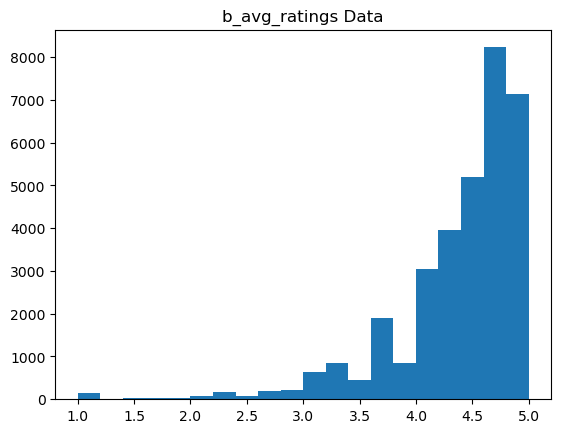

Summary: b_num_reviews
{'NAs': 0, 'mean': 117.19865117119286, 'median': 28.0, 'std': 287.6937065583241, 'min': 1, 'max': 8436, 'len': 33214}


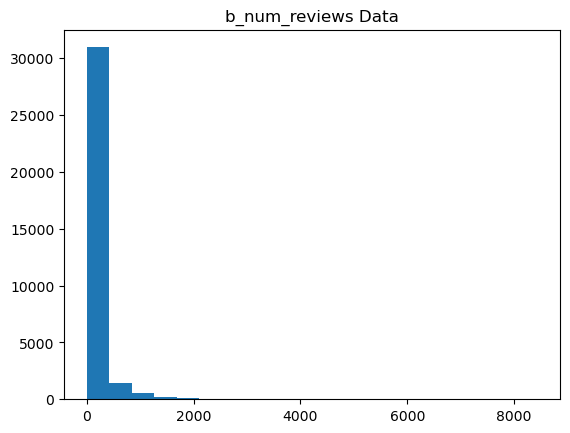

Summary: b_num_similar_bizs
{'NAs': 0, 'mean': 4.052658517492624, 'median': 5.0, 'std': 1.5962986732542621, 'min': 0, 'max': 5, 'len': 33214}


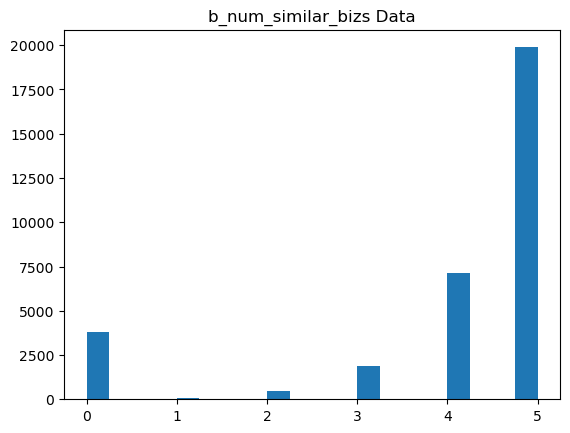

Summary: b_prices
{'NAs': 'error', 'mean': 1.5111528038357307, 'median': 1.0, 'std': 0.5403566107973059, 'min': 1, 'max': 4, 'len': 4797}


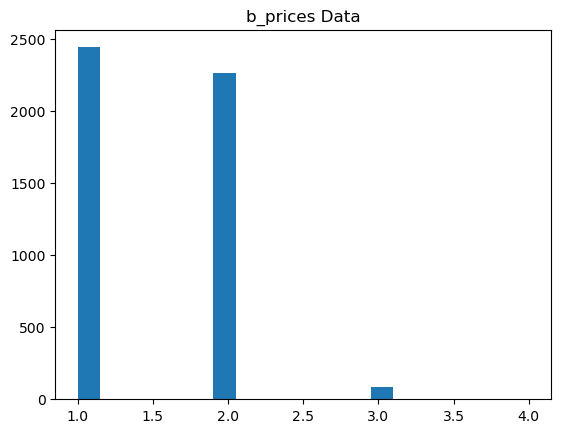

Summary: b_has_prices
{'NAs': 0, 'mean': 0.14442704883482868, 'median': 0.0, 'std': 0.35152222746177897, 'min': 0, 'max': 1, 'len': 33214}


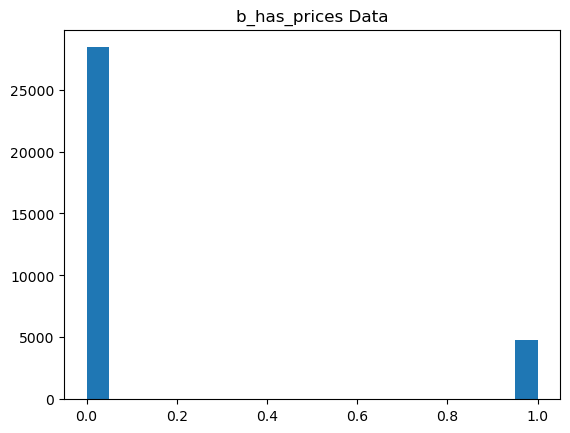

Summary: r_ratings
{'NAs': 'error', 'mean': 4.338928274127116, 'median': 5.0, 'std': 1.1388899716497667, 'min': 1, 'max': 5, 'len': 3869329}


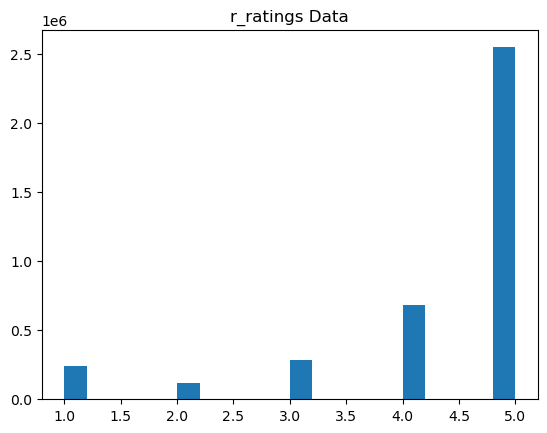

Summary: r_time_difs
{'NAs': 'error', 'mean': 2172259969.8378196, 'median': 139284509.5, 'std': 13443473027.347092, 'min': -197658283374, 'max': 314419792367, 'len': 729928}


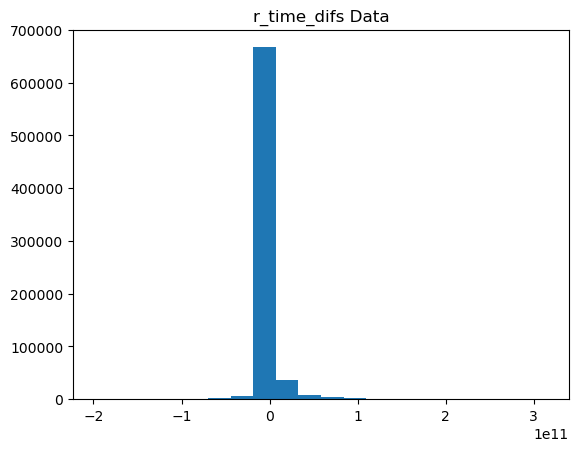

Summary: r_has_response
{'NAs': 0, 'mean': 0.18751509260048974, 'median': 0.0, 'std': 0.3903244581723257, 'min': 0, 'max': 1, 'len': 3892636}


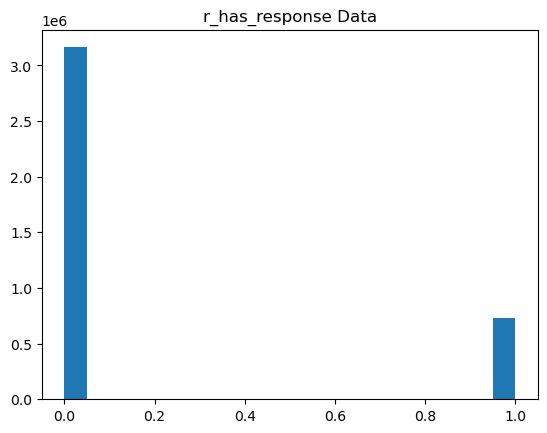

In [28]:
for lst in [['b_avg_ratings',b_avg_ratings], ['b_num_reviews',b_num_reviews], ['b_num_similar_bizs',b_num_similar_bizs], ['b_prices', b_prices], ['b_has_prices',b_has_prices], ['r_ratings',r_ratings], ['r_time_difs',r_time_difs], ['r_has_response',r_has_response]]:#, b_num_reviews, b_num_sim_bizs, r_ratings, r_time_difs, r_time_difs, r_has_response]:
    print('Summary: '+ str(lst[0]))
    print(summary(lst[1]))
    lst[1] = [i for i in lst[1] if i is not None]
    plt.hist(lst[1], bins = 20)
    plt.title(lst[0] + ' Data')
    plt.show()